In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_excel("hatespeech.xlsx", header=None)

In [37]:
df

,0,1,2
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama
...,...,...,...
1999,KakekGanteng6,IKN Potret Kemajuan,Netral
2000,Gungun88,"Kurang Ajar memang orang CINA itu, sudah hidup...",Ras
2001,Bita44,Nah ini paham wahabi semakin merebak di sekita...,Agama
2002,Angga21,"Kita hidup di negara pancasila, harus mengplem...",Netral


In [38]:
df.columns

Index([0, 1, 2], dtype='int64')

In [39]:
df.columns = ['User', 'Tweet', 'Category']

In [40]:
df.head()

,User,Tweet,Category
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama


In [41]:
df.duplicated().sum()

np.int64(45)

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.isna().sum()

User        1
Tweet       1
Category    2
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.isna().sum()

User        0
Tweet       0
Category    0
dtype: int64

In [47]:
# import re
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# # 1. SETUP
# stemmer = StemmerFactory().create_stemmer()
# stopword = StopWordRemoverFactory().create_stop_word_remover()

# def clean_text(text):
#     if type(text) != str: return ""
    
#     # 2. REGEX
#     text = re.sub(r'http\S+|@\w+|[^a-z\s]', ' ', text.lower())
    
#     # 3. SASTRAWI COMBO 
#     return stemmer.stem(stopword.remove(text))

In [48]:
# df['tweet_clean'] = df['Tweet'].apply(clean_text)

In [49]:
df['Category'].value_counts()

Category
Netral    822
Ras       589
Agama     546
Name: count, dtype: int64

In [50]:

def preprocess_text(text_series):
    # 1. Case Folding/Normalization (Jadikan huruf kecil)
    # 2. Text Cleaning (Hapus angka/simbol aneh)
    # 3. Remove Punctuation (Hapus tanda baca)
    # 4. Tokenization (Split jadi list kata)
    temp_tokens = text_series.str.lower().str.replace(r'[^a-z\s]', ' ', regex=True).str.strip()
    return temp_tokens

df['tweet_clean'] = preprocess_text(df['Tweet'])

In [51]:
df.head()

,User,Tweet,Category,tweet_clean
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral,amyliarm lingkunganmu keknya punya pemahaman k...
1,__succiduous,Udah jelek brengsek pula,Ras,udah jelek brengsek pula
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama,lucunya penghuni negeri ini selalu di hiasi da...
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras,yang jelek miskin udah pasti bukan kristen ...
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama,murtadhaone mereka memanfaatkan kebodohan kad...


In [52]:
category_mapping = {'Netral' : 0, 'Ras' : 1, 'Agama' : 2}

df['Category'] = df['Category'].map(category_mapping)

In [53]:
df.head()

,User,Tweet,Category,tweet_clean
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,0,amyliarm lingkunganmu keknya punya pemahaman k...
1,__succiduous,Udah jelek brengsek pula,1,udah jelek brengsek pula
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,2,lucunya penghuni negeri ini selalu di hiasi da...
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",1,yang jelek miskin udah pasti bukan kristen ...
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,2,murtadhaone mereka memanfaatkan kebodohan kad...


In [54]:
X_data = df['tweet_clean']
y_data = df['Category']

In [55]:
def stratified_split_data(X, y, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X = X.sample(frac=frac, random_state=random_state)
        y = y.loc[X.index]
        
    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split_data(X_data, y_data)

In [56]:
def build_vocabulary(text_series, min_counts=2):
    counts = pd.Series(" ".join(text_series).split()).value_counts()
    valid_words = sorted(counts[counts >= min_counts].index)
    return {w: i for i, w in enumerate(valid_words)}

def calculate_tf(text_series, vocab_index):
    n_docs = len(text_series)
    n_vocab = len(vocab_index)
    tf_matrix = np.zeros((n_docs, n_vocab))
    
    for row, text in enumerate(text_series):
        words = text.split()
        for w in words:
            if w in vocab_index:
                col_idx = vocab_index[w]
                tf_matrix[row, col_idx] += 1
    return tf_matrix

def calculate_idf(text_series, vocab_index):
    n_docs = len(text_series)
    df_counts = dict.fromkeys(vocab_index.keys(), 0)
    
    for text in text_series:
        for word in set(text.split()):
            if word in df_counts:
                df_counts[word] += 1
    return {word: np.log(n_docs / (count + 1)) for word, count in df_counts.items()}

def multiply_tfidf(tf_matrix, vocab_index, idf_values):
    matrix = tf_matrix.copy()
    
    for w, col_idx in vocab_index.items():
        matrix[:, col_idx] *= idf_values[w]
    return matrix

def normalize_l2(matrix):
    norms = np.sqrt(np.sum(matrix**2, axis=1, keepdims=True))
    norms[norms == 0] = 1
    return matrix / norms

In [57]:
vocab_index = build_vocabulary(X_train)

tf_train = calculate_tf(X_train, vocab_index)
tf_test = calculate_tf(X_test, vocab_index)

idf_values = calculate_idf(X_train, vocab_index)

X_train_matrix = multiply_tfidf(tf_train, vocab_index, idf_values)
X_test_matrix = multiply_tfidf(tf_test, vocab_index, idf_values)

X_train_matrix = normalize_l2(X_train_matrix)
X_test_matrix = normalize_l2(X_test_matrix)

print(f"Dimensi Train: {X_train_matrix.shape}")
print(f"Dimensi Test: {X_test_matrix.shape}")

Dimensi Train: (1564, 2325)
Dimensi Test: (393, 2325)


In [58]:
class NaiveBayesMultinomial:
    def __init__(self, alpha=1):
        self.alpha = alpha
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._priors = np.zeros(n_classes)
        self._feature_probs = np.zeros((n_classes, n_features))
        
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._priors[idx] = X_c.shape[0] / n_samples
            
            numerator = X_c.sum(axis=0) + self.alpha
            denominator = X_c.sum() + (self.alpha * n_features)
            
            self._feature_probs[idx] = numerator / denominator
            
    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            likelihood = np.sum(x * np.log(self._feature_probs[idx]))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]
    
    def predict(self, X):
        return np.array([self._predict(x) for x in X]) 

In [59]:
print("Accuracy |Alpha")

best_acc = 0
best_alpha = 0
list_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5]

for a in list_alpha:
    nbm = NaiveBayesMultinomial(a)
    nbm.fit(X_train_matrix, y_train)
    pred = nbm.predict(X_test_matrix)
    acc = np.mean(pred == y_test)
    
    print(f"{acc:.4f}   |{a}")
    if acc > best_acc:
        best_acc = acc
        best_alpha = a
        
print(f"Best Acc: {best_acc}   |Best Alpha: {best_alpha}")

Accuracy |Alpha
0.6260   |0.1
0.6514   |0.2
0.6438   |0.3
0.6310   |0.4
0.6361   |0.5
0.6463   |0.6
0.6489   |0.7
0.6412   |0.8
0.6489   |0.9
0.6514   |1
0.6539   |2
0.6310   |3
0.5827   |4
0.5547   |5
Best Acc: 0.6539440203562341   |Best Alpha: 2


In [60]:
print("Accuracy |Alpha")

best_acc = 0
best_alpha = 0
list_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5]

for a in list_alpha:
    nbm = NaiveBayesMultinomial(a)
    nbm.fit(X_train_matrix, y_train)
    pred = nbm.predict(X_train_matrix)
    acc = np.mean(pred == y_train)
    
    print(f"{acc:.4f}   |{a}")
    if acc > best_acc:
        best_acc = acc
        best_alpha = a
        
print(f"Best Acc: {best_acc}   |Best Alpha: {best_alpha}")

Accuracy |Alpha


0.9361   |0.1
0.9297   |0.2
0.9277   |0.3
0.9239   |0.4
0.9175   |0.5
0.9137   |0.6
0.9073   |0.7
0.8983   |0.8
0.8919   |0.9
0.8887   |1
0.8267   |2
0.7583   |3
0.6886   |4
0.6426   |5
Best Acc: 0.9360613810741688   |Best Alpha: 0.1


In [61]:
nbm = NaiveBayesMultinomial(2)
nbm.fit(X_train_matrix, y_train)
pred_test = nbm.predict(X_test_matrix)
pred_train = nbm.predict(X_train_matrix)

In [62]:
test_accuracy = np.mean(pred_test == y_test)
test_accuracy

np.float64(0.6539440203562341)

In [63]:
train_accuracy = np.mean(pred_train == y_train)
train_accuracy

np.float64(0.8267263427109974)

In [64]:
class KNN:
    def __init__(self, k, p):
        self.K = k
        self.P = p
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def jarak(self, x1, x2):
        if self.P == 1:
            return np.sum(np.abs(x1 - x2))
        else:
            return np.sqrt(np.sum((x1 - x2) ** 2))
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        jaraks = [self.jarak(x, x_train) for x_train in self.X_train]
        best_k = np.argsort(jaraks)[:self.K]
        label_k = [self.y_train[i] for i in best_k]
        hasil = max(set(label_k), key=label_k.count)
        return hasil

In [65]:
# print("|   K   |   Jarak   |   Akurasi   |")
# best_acc = 0
# best_params = {}

# for k in [3, 5, 7, 9]:
#     for p in [1, 2]:
#         model = KNN(k, p)
#         model.train(X_train_matrix, y_train)
#         pred = model.predict(X_test_matrix)
#         acc = np.mean(pred == y_test)
        
#         jarak = "Manhattan" if p == 1 else "Euclidean"
#         print(f"|   {k}   |   {jarak}   |   {acc}   ")
        
#         if acc > best_acc:
#             best_acc = acc
#             best_params = {'k' : k, 'p' : p}
            
            
# nama_jarak = "Manhattan" if best_params['p'] == 1 else "Euclidean"
# print(f"Best K: {best_params['k']} | Best Jarak: {nama_jarak} | Best Akurasi: {best_acc}")

In [66]:
# print("|   K   |   Jarak   |   Akurasi   |")
# best_acc = 0
# best_params = {}

# for k in [3, 5, 7, 9]:
#     for p in [1, 2]:
#         model = KNN(k, p)
#         model.train(X_train_matrix, y_train)
#         pred = model.predict(X_train_matrix)
#         acc = np.mean(pred == y_train)
        
#         jarak = "Manhattan" if p == 1 else "Euclidean"
#         print(f"|   {k}   |   {jarak}   |   {acc}   ")
        
#         if acc > best_acc:
#             best_acc = acc
#             best_params = {'k' : k, 'p' : p}
            
            
# nama_jarak = "Manhattan" if best_params['p'] == 1 else "Euclidean"
# print(f"Best K: {best_params['k']} | Best Jarak: {nama_jarak} | Best Akurasi: {best_acc}")

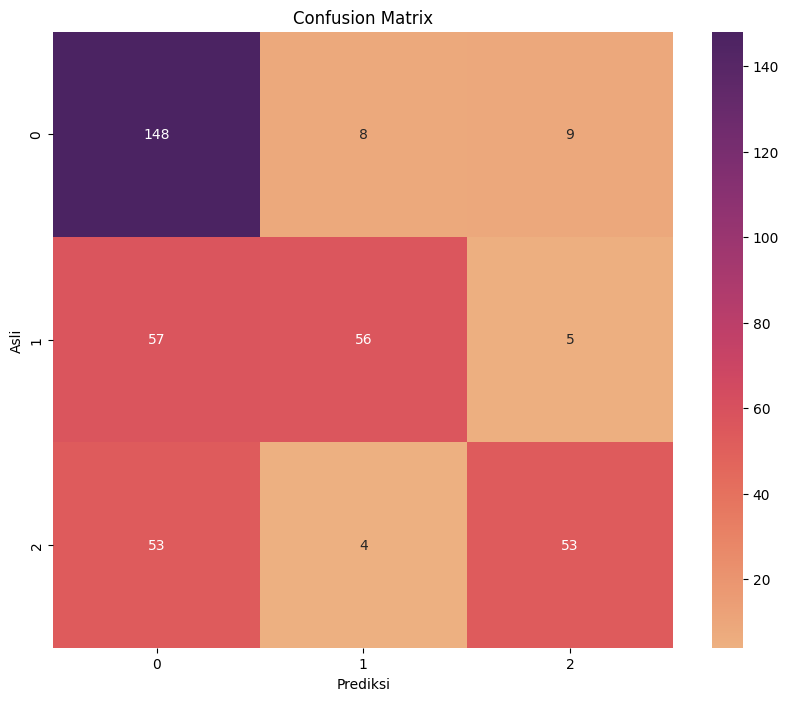

Kelas: 0
True Positives: 148
False Positives: 110
False Negatives: 17
True Negatives: 118
Kelas: 1
True Positives: 56
False Positives: 12
False Negatives: 62
True Negatives: 263
Kelas: 2
True Positives: 53
False Positives: 14
False Negatives: 57
True Negatives: 269


In [67]:
confusion_matrix = pd.crosstab(y_test, pred_test, rownames=['Asli'], colnames=['Prediksi'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values

TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    print(f"Kelas: {name}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}")

In [68]:
import tkinter as tk
from tkinter import *

def run_predict():
    text = entry.get("1.0", END).strip()
    if not text: return

    # Pipeline Manual
    clean = preprocess_text(pd.Series([text]))
    tf = calculate_tf(clean, vocab_index)
    tfidf = multiply_tfidf(tf, vocab_index, idf_values)
    tfidf_norm = normalize_l2(tfidf)
    pred = nbm.predict(tfidf_norm)[0]
    
    if pred == 1:
        teks_hasil = "Rasis"
    elif pred == 2:
        teks_hasil = "Sara"
    else:
        teks_hasil = "Netral"
    lbl_out.config(text=f"Kategori: {teks_hasil}", fg="blue")

# Setup UI Simple
root = Tk()
root.geometry("500x400")
root.title("Hatespeech")

Label(root, text="Input Tweet:", font=("Arial", 12)).pack(pady=10)
entry = Text(root, height=5, width=50)
entry.pack()

Button(root, text="PREDIKSI", command=run_predict, bg="green", fg="white").pack(pady=10)
lbl_out = Label(root, text="...", font=("Arial", 20, "bold"))
lbl_out.pack(pady=20)

root.mainloop()